1. Import Library

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import seaborn as sns

2. Threshold Function

In [2]:
def threshold_image(im,th):
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1
    return thresholded_im

3. Otsu's Function

In [3]:
def compute_otsu_criteria(im, th):
    thresholded_im = threshold_image(im,th)
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1
    if weight1 == 0 or weight0 == 0:
        return np.inf
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0 
    return weight0 * var0 + weight1 * var1

4. Genetic Algorhythm

In [55]:
def geneticAlgorhytm(im):
    jumlah_data = 10
    low = 0
    high = np.max(im) + 1
    interval_size = (high - low) / jumlah_data
    threshold_range = np.array([np.random.randint(low + int(i * interval_size), low + int((i + 1) * interval_size))for i in range(jumlah_data)])
    # print(threshold_range)
    print("Inisiasi = "+ str(threshold_range) + "\n")
    for generation in range(50):
        print("Generasi Ke-" + str(generation))
        criterias = np.array([compute_otsu_criteria(im,th) for th in threshold_range])
        sorted_indices = np.argsort(criterias)
        num_parents = 3
        parents = threshold_range[sorted_indices[:num_parents]]

        offspring = []
        while len(offspring) < jumlah_data - num_parents:
            if np.random.rand() < 0.75:
                parent1, parent2 = np.random.choice(parents, 2, replace=False)
                parent1bin = format(parent1, f"0{8}b")
                parent2bin = format(parent2, f"0{8}b")
                crossover_point = np.random.randint(1, 8)
                satudua = np.random.randint(0, 1)
                if satudua: childbin = parent1bin[:crossover_point] + parent2bin[crossover_point:]
                else: childbin = parent2bin[:crossover_point] + parent1bin[crossover_point:]
                child = int(childbin, 2)
                offspring.append(child)
            else:
                offspring.append(np.random.choice(parents))

        for i in range(len(offspring)):
            if np.random.rand() < 0.2:
                binernya = list(format(offspring[i], f"0{8}b"))
                mutasi_point = np.random.randint(1, 8)
                binernya[mutasi_point-1] = '0' if binernya[mutasi_point-1] == '1' else '1'
                offspring[i] = int(''.join(binernya), 2)

        threshold_range = np.concatenate((parents, offspring))
        print(threshold_range)
        if len(set(offspring)) == 1:
            print(f"Konvergen di generasi ke-{generation}")
            break

    final_fitness = np.array([compute_otsu_criteria(im, th) for th in threshold_range])
    best_threshold = threshold_range[np.argmin(final_fitness)]
    return best_threshold

5. Main Function

In [56]:
path_image = 'Globe.jpg'
im = np.asarray(Image.open(path_image).convert("L"))
th_from_GA = geneticAlgorhytm(im)
im_otsu = threshold_image(im,th_from_GA)

Inisiasi = [ 23  35  56  86 116 143 157 169 200 238]

Generasi Ke-0
[143 116 157 125 116 125 143  15 140 157]
Generasi Ke-1
[140 143 143 140 143 143 141 135 143 143]
Generasi Ke-2
[135 140 140 140 135 141 140 140 134 132]
Generasi Ke-3
[135 135 134 135 134 133 135 135 135 135]
Generasi Ke-4
[135 135 135 135 135 135   7 135 135 135]
Generasi Ke-5
[135 135 135 135 131 143 135   7 135 135]
Generasi Ke-6
[135 135 135 135 135 135 135 135 135 131]
Generasi Ke-7
[135 135 135   7 135 135 135 135 135   7]
Generasi Ke-8
[135 135 135 135 135 167 133 135 135 135]
Generasi Ke-9
[135 135 135 135 135 135 135 135 135 135]
Konvergen di generasi ke-9


6. Testing input image

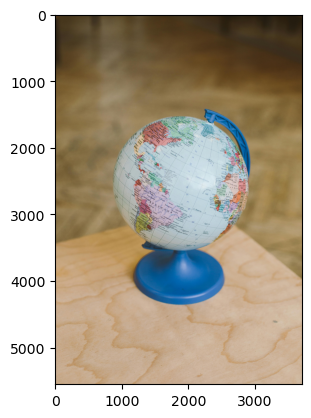

In [49]:
import matplotlib.image as mpimg
image = mpimg.imread(path_image)
plt.imshow(image)
plt.show()

7. Original (in Greyscale vs After Otsu's Method)

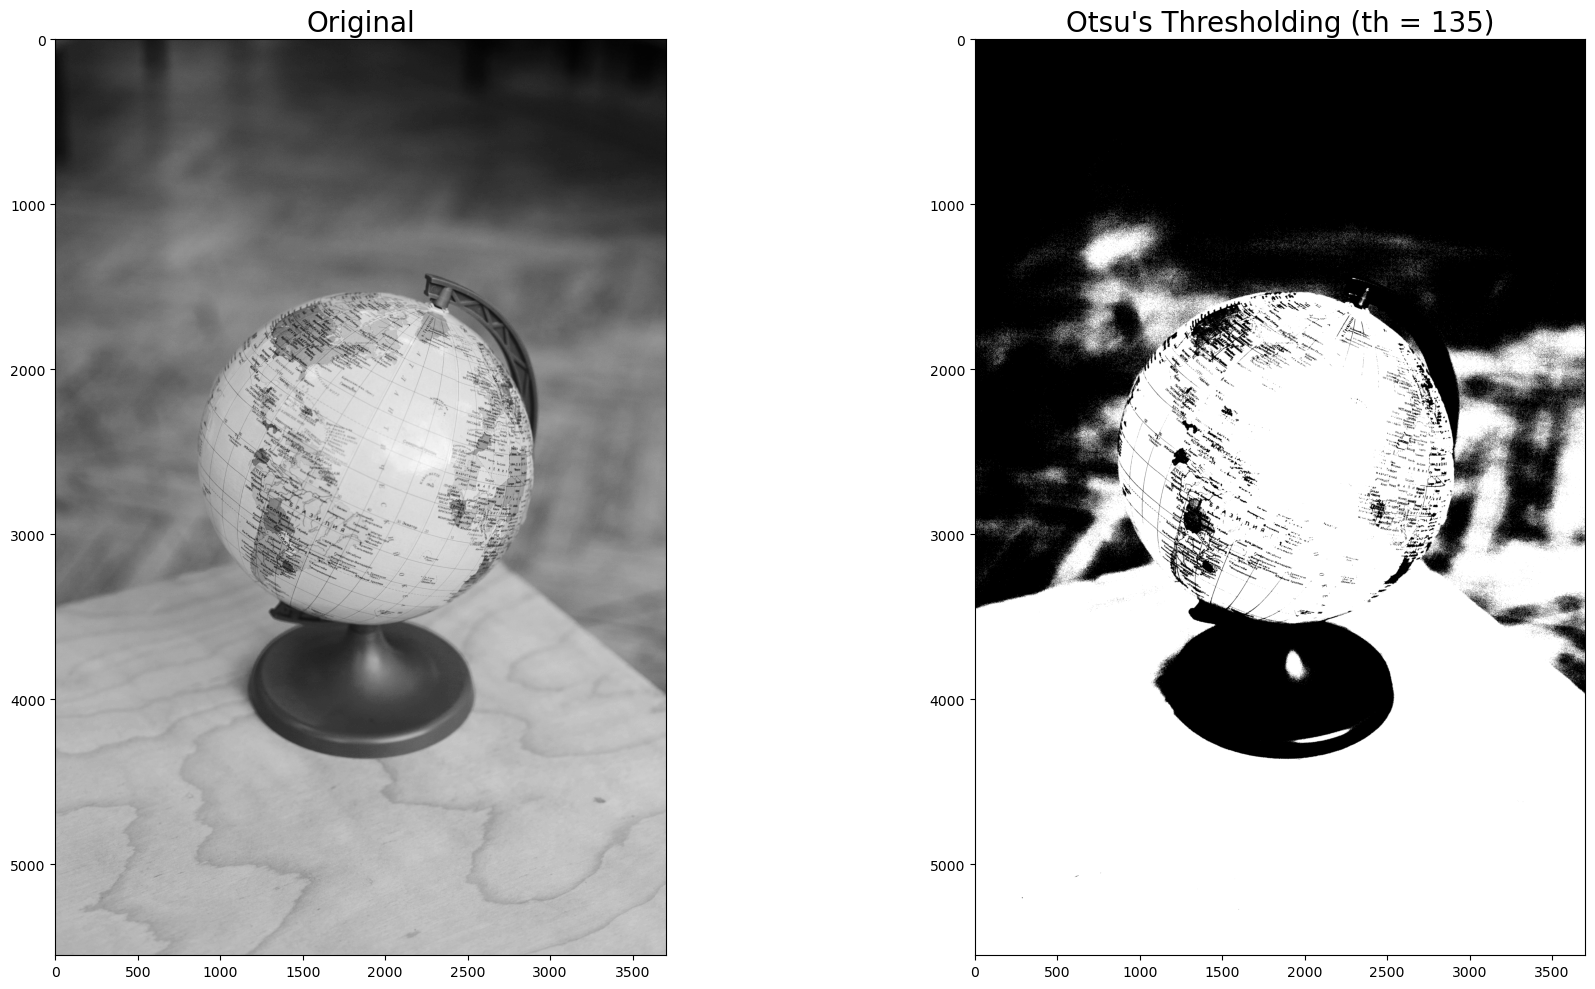

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original', fontsize=20)
plt.imshow(im, cmap="gray")
plt.subplot(1, 2, 2)
plt.title(f"Otsu's Thresholding (th = {th_from_GA})", fontsize=20)
plt.imshow(im_otsu, cmap="gray")
plt.tight_layout()